In [ ]:
import pandas as pd
meta=pd.read_csv('metadata.csv',low_memory=False)
meta["publish_time"] = pd.to_datetime(meta["publish_time"])
meta["publish_year"] = pd.DatetimeIndex(meta["publish_time"]).year
meta = meta[meta["publish_year"]==2020]

input_df= meta.head(5000)
print(input_df.head())
input_df

      cord_uid                                       sha  ... s2_id publish_year
4248  f9tg6xsg  44449ad1cca160ce491d7624f8ae1028f3570c45  ...   NaN       2020.0
4249  f73c639r  def41c08c3cb1b3752bcff34d3aed7f8486e1c86  ...   NaN       2020.0
4250  1qgpa45q  f5ae3f66face323615df39d838e056ab5fcc98df  ...   NaN       2020.0
4251  g34f5w6b  5be75ae4e7f8c892abd8dc396b9dbd035772c84a  ...   NaN       2020.0
4252  d1pd09zj  1cee4a0d0e823379ec34a462a04561bf4cd736a2  ...   NaN       2020.0

[5 rows x 20 columns]


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,publish_year
4248,f9tg6xsg,44449ad1cca160ce491d7624f8ae1028f3570c45,PMC,Dexmedetomidine improved renal function in pat...,10.1186/s40560-019-0415-z,PMC6939335,31908779,cc-by,BACKGROUND: Dexmedetomidine has been reported ...,2020-01-02,"Nakashima, Tsuyoshi; Miyamoto, Kyohei; Shima, ...",J Intensive Care,NaN,NaN,NaN,document_parses/pdf_json/44449ad1cca160ce491d7...,document_parses/pmc_json/PMC6939335.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0
4249,f73c639r,def41c08c3cb1b3752bcff34d3aed7f8486e1c86,PMC,Aortic volume determines global end-diastolic ...,10.1186/s40635-019-0284-8,PMC6940405,31897796,cc-by,BACKGROUND: Global end-diastolic volume (GEDV)...,2020-01-02,"Akohov, Aleksej; Barner, Christoph; Grimmer, S...",Intensive Care Med Exp,NaN,NaN,NaN,document_parses/pdf_json/def41c08c3cb1b3752bcf...,document_parses/pmc_json/PMC6940405.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0
4250,1qgpa45q,f5ae3f66face323615df39d838e056ab5fcc98df,PMC,Whole genome sequencing and phylogenetic analy...,10.1186/s12864-019-6400-z,PMC6941262,31898474,cc-by,BACKGROUND: Human metapneumovirus (HMPV) is an...,2020-01-02,"Kamau, Everlyn; Oketch, John W.; de Laurent, Z...",BMC Genomics,NaN,NaN,NaN,document_parses/pdf_json/f5ae3f66face323615df3...,document_parses/pmc_json/PMC6941262.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0
4251,g34f5w6b,5be75ae4e7f8c892abd8dc396b9dbd035772c84a,PMC,European intensive care physicians’ experience...,10.1186/s13756-019-0662-8,PMC6941296,31908772,cc-by,BACKGROUND: Antimicrobial resistance (AMR) com...,2020-01-02,"Lepape, Alain; Jean, Astrid; De Waele, Jan; Fr...",Antimicrob Resist Infect Control,NaN,NaN,NaN,document_parses/pdf_json/5be75ae4e7f8c892abd8d...,document_parses/pmc_json/PMC6941296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0
4252,d1pd09zj,1cee4a0d0e823379ec34a462a04561bf4cd736a2,PMC,Synthetic carbohydrate-based vaccines: challen...,10.1186/s12929-019-0591-0,PMC6941340,31900143,cc-by,Glycoconjugate vaccines based on bacterial cap...,2020-01-03,"Mettu, Ravinder; Chen, Chiang-Yun; Wu, Chung-Yi",J Biomed Sci,NaN,NaN,NaN,document_parses/pdf_json/1cee4a0d0e823379ec34a...,document_parses/pmc_json/PMC6941340.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,iqy2kaat,19330ceca04f14d0371eb4ed4b7cbc3edde91724,PMC,Linear Time Algorithm for Tree-Child Network C...,10.1007/978-3-030-42266-0_8,PMC7197097,NaN,no-cc,Phylogenetic networks are used to represent ev...,2020-02-01,"Janssen, Remie; Murakami, Yukihiro",Algorithms for Computational Biology,NaN,NaN,NaN,document_parses/pdf_json/19330ceca04f14d0371eb...,document_parses/pmc_json/PMC7197097.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0
26971,8z6us7v4,ac1d1a76a5c769b1b6a526983606a533f90c803d,PMC,Time Series Adjustment Enhancement of Hierarch...,10.1007/978-3-030-42266-0_11,PMC7197098,NaN,no-cc,"Network models of gene interactions, using tim...",2020-02-01,"Allen, Edward E.; Farrell, John; Harkey, Alexa...",Algorithms for Computational Biology,NaN,NaN,NaN,document_parses/pdf_json/ac1d1a76a5c769b1b6a52...,document_parses/pmc_json/PMC7197098.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0
26972,5sbflghq,74688307b68b51166c24837afd144caa61073922,PMC,Parallel Generalized Suffix Tree Construction ...,10.1007/978-3-030-42266-0_1,PMC7197101,NaN,no-cc,After a decade of digitization and technologic...,2020-02-01,"Aziz, Md Momin Al; Thulasiraman, Parimala; Moh...",Algorithms for Computational Biology,NaN,NaN,NaN,document_parses/pdf_json/74688307b68b51166c248...,document_parses/pmc_json/PMC7197101.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0
26973,rto

In [ ]:
# Finding the shape of dataset
input_df.shape

(5000, 20)

In [ ]:
# Find the basic information of the dataset and for the null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 4248 to 26974
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cord_uid          5000 non-null   object        
 1   sha               3939 non-null   object        
 2   source_x          5000 non-null   object        
 3   title             5000 non-null   object        
 4   doi               5000 non-null   object        
 5   pmcid             5000 non-null   object        
 6   pubmed_id         4038 non-null   object        
 7   license           5000 non-null   object        
 8   abstract          3436 non-null   object        
 9   publish_time      5000 non-null   datetime64[ns]
 10  authors           4588 non-null   object        
 11  journal           4634 non-null   object        
 12  mag_id            0 non-null      float64       
 13  who_covidence_id  0 non-null      object        
 14  arxiv_id          0 

In [ ]:
#Checking for null and non-null values in the dataset using the info() dot match

print(input_df.isnull().sum())
# Dropping the null values

input_df=input_df.dropna()

cord_uid               0
sha                 1061
source_x               0
title                  0
doi                    0
pmcid                  0
pubmed_id            962
license                0
abstract            1564
publish_time           0
authors              412
journal              366
mag_id              5000
who_covidence_id    5000
arxiv_id            5000
pdf_json_files      1061
pmc_json_files      1057
url                    0
s2_id               5000
publish_year           0
dtype: int64


In [ ]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['abstract'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].fillna("")
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split()))#convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df
input_df['title_'] = input_df['title'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['title_'] = input_df['title_'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,publish_year,cleaned_data,title_
4248,f9tg6xsg,44449ad1cca160ce491d7624f8ae1028f3570c45,PMC,Dexmedetomidine improved renal function in pat...,10.1186/s40560-019-0415-z,PMC6939335,31908779,cc-by,BACKGROUND: Dexmedetomidine has been reported ...,2020-01-02,"Nakashima, Tsuyoshi; Miyamoto, Kyohei; Shima, ...",J Intensive Care,NaN,NaN,NaN,document_parses/pdf_json/44449ad1cca160ce491d7...,document_parses/pmc_json/PMC6939335.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0,background dexmedetomidine reported improve or...,dexmedetomidine improved renal function in pat...
4249,f73c639r,def41c08c3cb1b3752bcff34d3aed7f8486e1c86,PMC,Aortic volume determines global end-diastolic ...,10.1186/s40635-019-0284-8,PMC6940405,31897796,cc-by,BACKGROUND: Global end-diastolic volume (GEDV)...,2020-01-02,"Akohov, Aleksej; Barner, Christoph; Grimmer, S...",Intensive Care Med Exp,NaN,NaN,NaN,document_parses/pdf_json/def41c08c3cb1b3752bcf...,document_parses/pmc_json/PMC6940405.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0,background global end diastolic volume gedv me...,aortic volume determines global end diastolic ...
4250,1qgpa45q,f5ae3f66face323615df39d838e056ab5fcc98df,PMC,Whole genome sequencing and phylogenetic analy...,10.1186/s12864-019-6400-z,PMC6941262,31898474,cc-by,BACKGROUND: Human metapneumovirus (HMPV) is an...,2020-01-02,"Kamau, Everlyn; Oketch, John W.; de Laurent, Z...",BMC Genomics,NaN,NaN,NaN,document_parses/pdf_json/f5ae3f66face323615df3...,document_parses/pmc_json/PMC6941262.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0,background human metapneumovirus hmpv importan...,whole genome sequencing and phylogenetic analy...
4251,g34f5w6b,5be75ae4e7f8c892abd8dc396b9dbd035772c84a,PMC,European intensive care physicians’ experience...,10.1186/s13756-019-0662-8,PMC6941296,31908772,cc-by,BACKGROUND: Antimicrobial resistance (AMR) com...,2020-01-02,"Lepape, Alain; Jean, Astrid; De Waele, Jan; Fr...",Antimicrob Resist Infect Control,NaN,NaN,NaN,document_parses/pdf_json/5be75ae4e7f8c892abd8d...,document_parses/pmc_json/PMC6941296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0,background antimicrobial resistance amr compro...,european intensive care physicians experience ...
4252,d1pd09zj,1cee4a0d0e823379ec34a462a04561bf4cd736a2,PMC,Synthetic carbohydrate-based vaccines: challen...,10.1186/s12929-019-0591-0,PMC6941340,31900143,cc-by,Glycoconjugate vaccines based on bacterial cap...,2020-01-03,"Mettu, Ravinder; Chen, Chiang-Yun; Wu, Chung-Yi",J Biomed Sci,NaN,NaN,NaN,document_parses/pdf_json/1cee4a0d0e823379ec34a...,document_parses/pmc_json/PMC6941340.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2020.0,glycoconjugate vaccines based bacterial capsul...,synthetic carbohydrate based vaccines challeng...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,iqy2kaat,19330ceca04f14d0371eb4ed4b7cbc3edde91724,PMC,Linear Time Algorithm for Tree-Child Network C...,10.1007/978-3-030-42266-0_8,PMC7197097,NaN,no-cc,Phylogenetic networks are used to represent ev...,2020-02-01,"Janssen, Remie; Murakami, Yukihiro",Algorithms for Computational Biology,NaN,NaN,NaN,document_parses/pdf_json/19330ceca04f14d0371eb...,document_parses/pmc_json/PMC7197097.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0,phylogenetic networks used represent evolution...,linear time algorithm for tree child network c...
26971,8z6us7v4,ac1d1a76a5c769b1b6a526983606a533f90c803d,PMC,Time Series Adjustment Enhancement of Hierarch...,10.1007/978-3-030-42266-0_11,PMC7197098,NaN,no-cc,"Network models of gene interactions, using tim...",2020-02-01,"Allen, Edward E.; Farrell, John; Harkey, Alexa...",Algorithms for Computational Biology,NaN,NaN,NaN,document_parse

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# The vectorizer object is used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# Applying the transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us the word of each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [ ]:
import sys
sys.path.insert(1,'/content/')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
def LDA_MODEL(number_of_topics,tf,feature_names, no_top_words):
  number_of_topics = 10
  model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
  model.fit(tf)
  return display_topics(model,feature_names, no_top_words)
  pass

def display_topics(model, feature_names, no_top_words):
  topic_dict = {}
  for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
  return pd.DataFrame.from_dict(topic_dict)

In [ ]:
import time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
result = LDA_MODEL(10,tf,tf_feature_names,10)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
result

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 23.12856650352478


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,cells,884.2,health,466.5,virus,937.0,health,402.7,cancer,436.6,care,505.7,patients,2287.9,data,374.6,patients,582.5,disease,398.6
1,cell,633.8,research,357.7,infection,755.1,study,381.7,drug,392.9,health,491.0,p,1757.6,based,352.9,clinical,327.1,model,290.2
2,expression,571.9,covid,314.1,influenza,488.4,risk,281.4,cell,378.8,study,356.3,group,709.1,using,304.4,studies,326.4,diagnosis,244.6
3,protein,426.2,information,256.5,viral,485.7,data,276.8,immune,348.4,participants,238.8,study,604.7,model,259.1,care,324.7,cases,222.2
4,induced,396.2,medical,225.6,vaccine,456.7,results,263.4,development,256.4,intervention,216.2,ci,507.9,used,243.6,supplementary,311.1,clinical,215.0
5,mice,364.2,public,218.1,viruses,391.1,among,240.2,treatment,250.4,self,216.2,results,489.9,analysis,237.8,material,298.0,lung,194.2
6,gene,318.7,social,196.3,host,299.2,ci,206.3,review,246.1,results,213.1,associated,481.2,method,234.9,mortality,290.7,using,187.8
7,activity,301.5,data,188.8,human,294.0,associated,200.8,cells,212.5,quality,208.1,mortality,477.2,results,232.4,review,253.6,patients,185.3
8,role,289.5,knowledge,164.3,infections,290.4,years,186.7,disease,206.9,data,191.2,vs,473.1,information,231.7,risk,252.1,patient,183.0
9,il,280.5,use,162.2,b,278.7,population,183.2,hiv,205.1,physical,174.5,compared,437.8,different,217.5,available,224.7,diagnostic,176.0


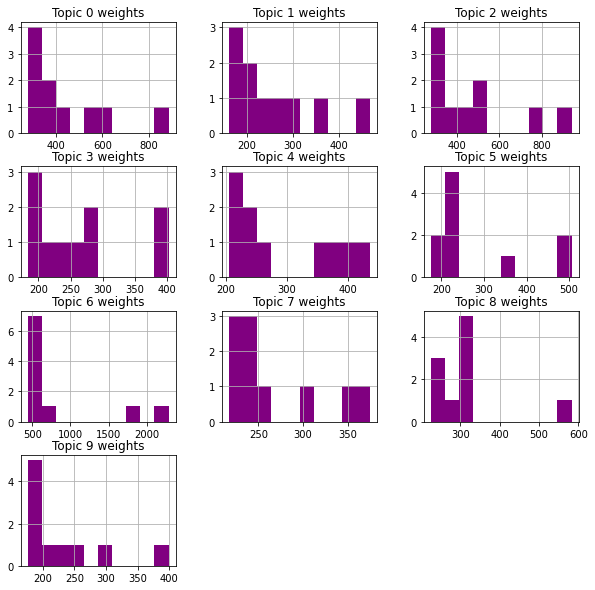

In [ ]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)

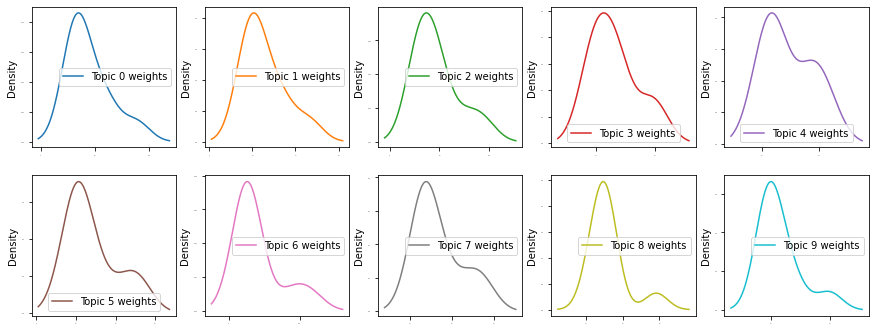

In [ ]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

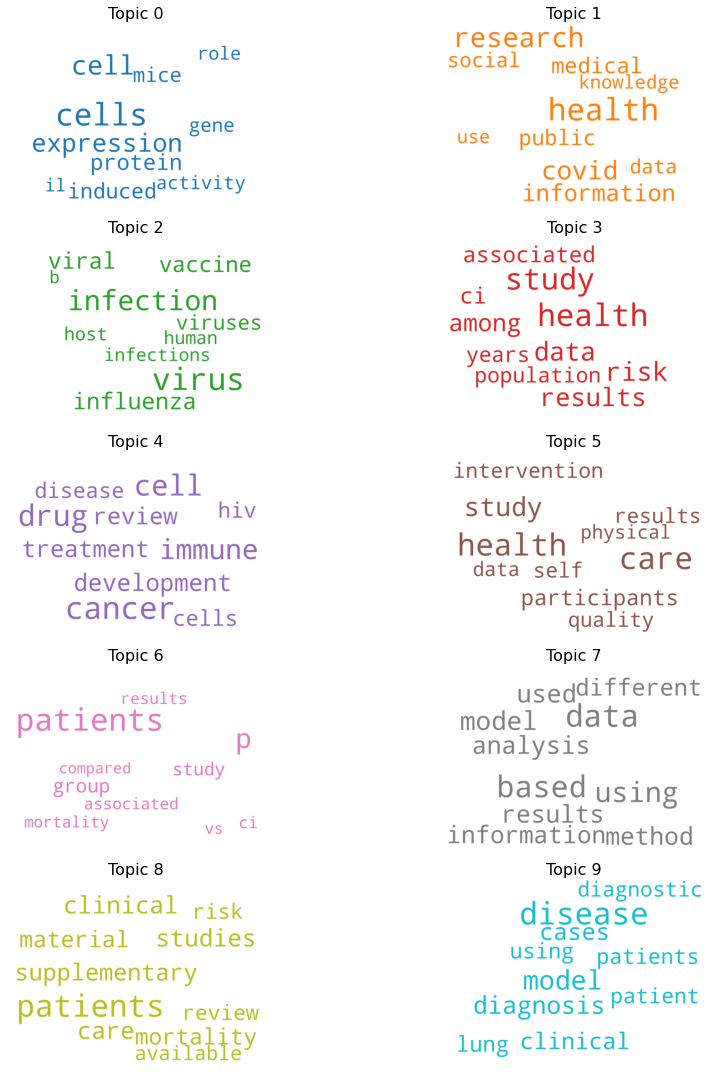

In [ ]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

def LSA_MODEL(tf,vectorizer):
  svd_model = TruncatedSVD(n_components=20, algorithm ='randomized', n_iter=100, random_state=122)
  svd_model.fit(tf)
  terms = vectorizer.get_feature_names()
  df = pd.DataFrame()
  for i, comp in enumerate(svd_model.components_):
    term_comp = zip(terms,comp)
    sorted_terms = sorted(term_comp, key = lambda x:x[1], reverse = True)[:7]
    str1 = "Topic "+str(i)
    str2 = str1 + " weights"
    str1_list = list()
    str2_list = list()
    for j in sorted_terms:
      str1_list.append(j[0])
      str2_list.append(j[1])
    df[str1] = str1_list
    df[str2] = str2_list
  return df

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
lsa_result=LSA_MODEL(tf,vectorizer)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
lsa_result

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 37.0116605758667


,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,patients,0.436995,patients,0.557937,health,0.451258,patients,0.454691,health,0.523311,virus,0.372103,group,0.505906,p,0.339304,risk,0.226097,care,0.351845,study,0.234950,data,0.303424,hiv,0.416053,group,0.318544,ci,0.350171,data,0.403657,care,0.236165,model,0.218202,hiv,0.292632,treatment,0.277525
1,p,0.261205,p,0.222389,care,0.204809,acute,0.098129,cells,0.375260,influenza,0.344409,study,0.140770,health,0.178649,ci,0.221062,data,0.238583,model,0.181043,influenza,0.268688,b,0.301246,vaccine,0.252105,influenza,0.321749,group,0.244621,b,0.230515,disease,0.194794,ci,0.257269,hiv,0.204533
2,study,0.199656,mortality,0.109757,data,0.182281,care,0.095871,cell,0.220184,infection,0.299266,care,0.138994,b,0.167740,disease,0.216615,respiratory,0.198524,health,0.155536,disease,0.210040,ci,0.183307,cell,0.234247,studies,0.144775,ci,0.194606,influenza,0.189984,cell,0.181665,protein,0.183857,influenza,0.195097
3,results,0.162070,vs,0.079518,research,0.107227,patient,0.084536,cd,0.167704,health,0.242470,control,0.131083,respiratory,0.134460,lung,0.177386,cells,0.189687,patients,0.142583,cd,0.153639,used,0.169490,mortality,0.208032,based,0.118009,n,0.184536,ci,0.172279,cancer,0.145360,lung,0.182779,model,0.146393
4,health,0.120924,ci,0.069192,social,0.093941,b,0.074174,care,0.155105,ci,0.167507,trial,0.128982,patients,0.125827,associated,0.162065,ventilation,0.181648,b,0.114510,cells,0.147328,cd,0.167353,disease,0.135564,hn,0.095350,respiratory,0.142217,disease,0.164316,lung,0.137404,care,0.179130,social,0.127741
5,data,0.120287,icu,0.065663,medical,0.091839,respiratory,0.069538,patients,0.141830,mortality,0.146990,virus,0.119692,may,0.121206,may,0.159655,mortality,0.173024,using,0.099322,treatment,0.128160,cell,0.139077,vaccination,0.131574,health,0.094787,b,0.129689,gene,0.125763,cases,0.125998,model,0.144815,risk,0.118811
6,associated,0.117599,group,0.062295,information,0.084173,clinical,0.068644,il,0.098056,hn,0.139474,treatment,0.118905,used,0.098618,acute,0.151413,acute,0.170885,results,0.091110,vaccination,0.113466,recommendations,0.129268,vs,0.115250,b,0.093729,virus,0.109759,patient,0.122222,care,0.124074,il,0.137584,data,0.117515


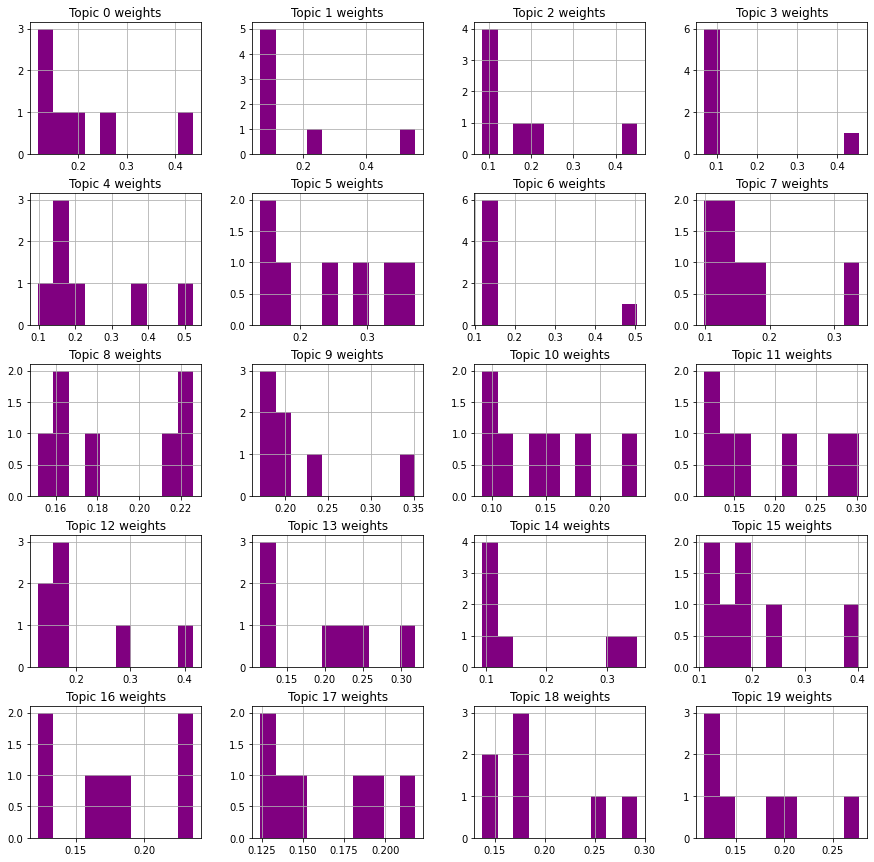

In [ ]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)

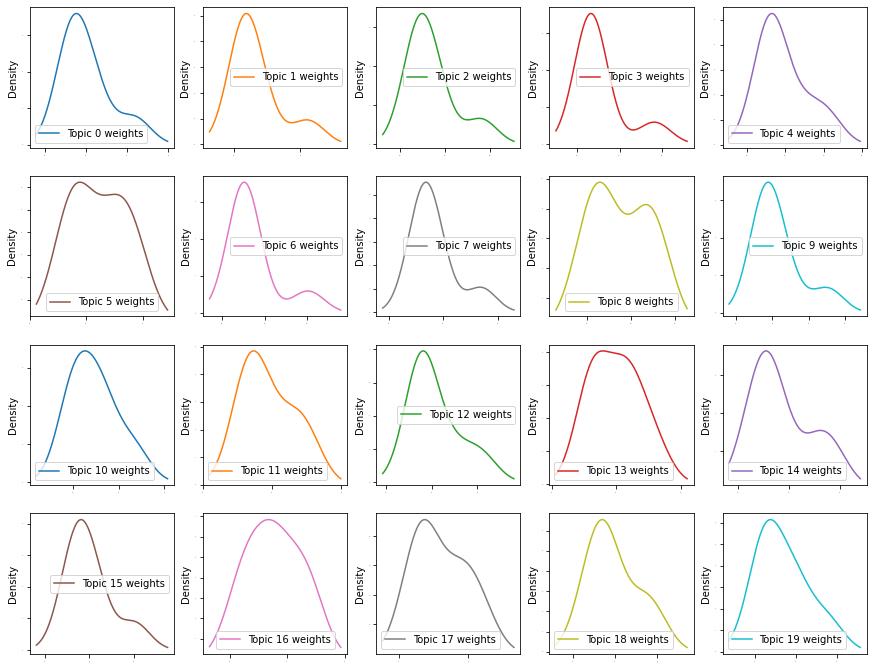

In [ ]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

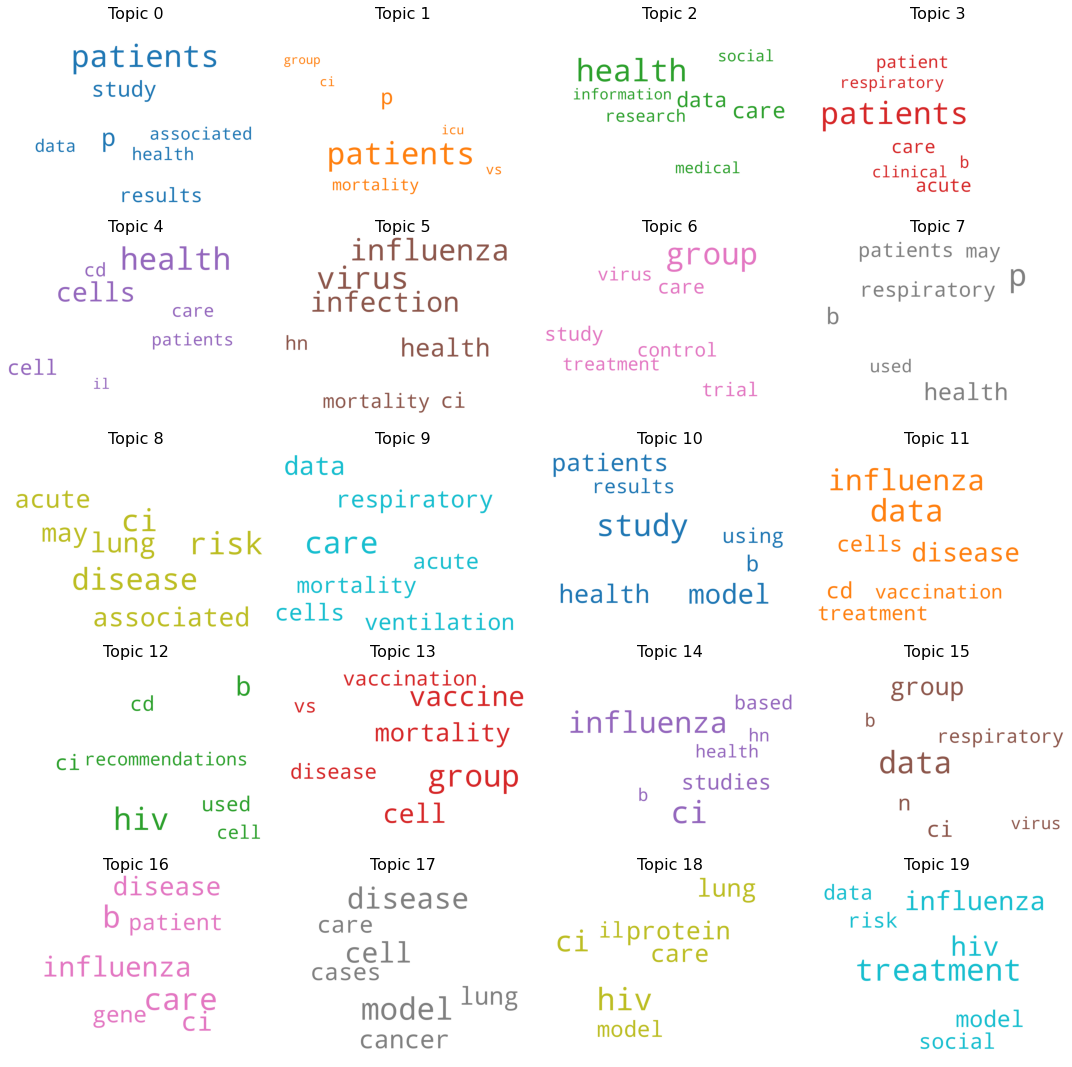

In [ ]:
# 1. Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

HMM - LDA Topic Modelling

In [ ]:
from __future__ import print_function
import time

from six.moves import xrange
import numpy as np
from scipy.special import gammaln

class BaseTopicModel(object):
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)

class BaseGibbsParamTopicModel(BaseTopicModel):


    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class HMM_LDA(BaseGibbsParamTopicModel):

    def __init__(self, n_docs, n_voca, n_topic, n_class, alpha=0.1, beta=0.01, gamma=0.1, eta=0.1, **kwargs):
        super(HMM_LDA, self).__init__(n_docs, n_voca, n_topic, alpha, beta, **kwargs)
        self.n_class = n_class

        self.gamma = gamma
        self.eta = eta

        self.CW = np.zeros([self.n_class, self.n_voca]) + self.gamma  # class x word
        self.sum_C = np.zeros([self.n_class]) + self.n_voca * self.gamma

        self.T = np.zeros([self.n_class + 2, self.n_class + 2]) + self.eta

        self.word_class = list()
        self.word_topic = list()

    def fit(self, docs, max_iter=100):
        self.random_init(docs)
        self.gibbs_sampling(docs, max_iter)

    # randomly initialize 
    def random_init(self, docs):

        for di in xrange(self.n_doc):
            doc = docs[di]
            num_sentence = len(doc)

            doc_class = list()
            doc_topic = list()

            for si in xrange(num_sentence):
                sentence_class = list()
                sentence_topic = list()

                sentence = doc[si]
                len_sentence = len(sentence)

                for wi in xrange(len_sentence):
                    word = sentence[wi]
                    c = np.random.randint(self.n_class)

                    sentence_class.append(c)
                    self.CW[c, word] += 1
                    self.sum_C[c] += 1
                    if wi == 0:  # if the first word
                        self.T[self.n_class, c] += 1
                    else:
                        self.T[sentence_class[wi - 1], c] += 1

                    if wi == len_sentence - 1:  # the last word
                        self.T[c, self.n_class + 1] += 1

                    k = np.random.randint(self.n_topic)
                    sentence_topic.append(k)
                    self.DT[di, k] += 1
                    if c == 0:
                        self.TW[k, word] += 1
                        self.sum_T[k] += 1

                doc_class.append(sentence_class)
                doc_topic.append(sentence_topic)

            self.word_class.append(doc_class)
            self.word_topic.append(doc_topic)

    def gibbs_sampling(self, docs, max_iter):

        for iter in xrange(max_iter):
            tic = time.time()
            for di, doc in enumerate(docs):
                doc_topic = self.word_topic[di]
                doc_class = self.word_class[di]

                for si, sentence in enumerate(doc):
                    len_sentence = len(sentence)

                    sentence_topic = doc_topic[si]
                    sentence_class = doc_class[si]

                    for wi, word in enumerate(sentence):

                        if wi == 0:
                            prev_c = self.n_class
                        else:
                            prev_c = sentence_class[wi - 1]

                        if wi == len_sentence - 1:
                            next_c = self.n_class + 1
                        else:
                            next_c = sentence_class[wi + 1]

                        old_c = sentence_class[wi]
                        old_t = sentence_topic[wi]

                        # remove previous state
                        self.CW[old_c, word] -= 1
                        self.sum_C[old_c] -= 1
                        self.T[prev_c, old_c] -= 1
                        self.T[old_c, next_c] -= 1

                        # sample class
                        prob = (self.T[prev_c, :self.n_class] / self.T[prev_c].sum()) \
                                * (self.T[:self.n_class, next_c] / np.sum(self.T[:self.n_class], 1))
                        prob[0] *= (self.TW[old_t, word] / self.sum_T[old_t])
                        prob[1:] *= self.CW[1:, word] / self.sum_C[1:]

                        new_c = np.random.multinomial(1, prob).argmax()

                        sentence_class[wi] = new_c
                        self.CW[new_c, word] += 1
                        self.sum_C[new_c] += 1
                        self.T[prev_c, new_c] += 1
                        self.T[new_c, next_c] += 1

                        # remove previous topic state
                        self.DT[di, old_t] -= 1
                        if old_c == 0:
                            self.TW[old_t, word] -= 1
                            self.sum_T[old_t] -= 1

                        # sample topic
                        prob = self.DT[di].copy()
                        if new_c == 0:
                            prob *= self.TW[:, word] / self.sum_T
                        prob /= np.sum(prob)

                        new_topic = np.random.multinomial(1, prob).argmax()
                        self.DT[di, new_topic] += 1
                        if new_c == 0:
                            self.TW[new_topic, word] += 1
                            self.sum_T[new_topic] += 1
                        sentence_topic[wi] = new_topic

            if self.verbose:
                ll = self.log_likelihood()
                logger.info('[ITER] %d,\telapsed time: %.2f\tlog-likelihood:%.2f', iter, time.time() - tic, ll)

    def log_likelihood(self):

        ll = self.n_doc * gammaln(self.alpha * self.n_topic)
        ll -= self.n_doc * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di]).sum() - gammaln(self.DT[di].sum())
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki]).sum() - gammaln(self.sum_T[ki])

        if self.n_class != 1:
            ll += (self.n_class - 1) * gammaln(self.gamma * (self.n_class - 1))
            ll -= (self.n_class - 1) * self.n_voca * gammaln(self.gamma)
            ll += (self.n_class + 2) * gammaln(self.eta * (self.n_class + 2))
            ll -= (self.n_class + 2) * (self.n_class + 2) * gammaln(self.eta)

            for ci in xrange(1, self.n_class):
                ll += gammaln(self.CW[ci]).sum() - gammaln(self.sum_C[ci])
            for ci in xrange(self.n_class + 2):
                ll += gammaln(self.T[ci]).sum() - gammaln(self.T[ci].sum())

        return ll

In [ ]:
#import AlgorithmHMMLDA as HMMLDA
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

0
1
2
3
4
5
6
7
8
9


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Runtime of the program is 1.8844010829925537


Supervised LDA Topic Modelling

In [ ]:
!pip install pymc

     |████████████████████████████████| 389kB 4.9MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1352872 sha256=cc96d5cce7c1e952e73d9ed1b3fd1a12f5b03a33e6ffc45636f27f8afaba7784
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [ ]:
training_data = input_df['cleaned_data'].values

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [ ]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [ ]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [ ]:
from __future__ import print_function

import numpy as np
from scipy.special import gammaln
from scipy.stats import norm
from numpy.linalg import solve
from six.moves import xrange

import numpy as np


import numpy as np

from six.moves import xrange


def sampling_from_dist(prob):
    """ Sample index from a list of unnormalised probability distribution
        same as np.random.multinomial(1, prob/np.sum(prob)).argmax()
    Parameters
    ----------
    prob: ndarray
        array of unnormalised probability distribution
    Returns
    -------
    new_topic: return a sampled index
    """
    thr = prob.sum() * np.random.rand()
    new_topic = 0
    tmp = prob[new_topic]
    while tmp < thr:
        new_topic += 1
        tmp += prob[new_topic]
    return new_topic


def sampling_from_dict(prob):
    """ sample key from dictionary `prob` where values are unnormalised probability distribution
    Parameters
    ----------
    prob: dict
        key = topic
        value = unnormalised probability of the topic
    Returns
    -------
    key: int
        sampled key
    """
    prob_sum = sum(prob.values())

    thr = prob_sum * np.random.rand()
    tmp = 0
    for key, p in prob.items():
        tmp += p
        if tmp < thr:
            new_topic = key
    return new_topic


def isfloat(value):
    """
    Check the value is convertable to float value
    """
    try:
        float(value)
        return True
    except ValueError:
        return False


def read_voca(path):
    """
    open file from path and read each line to return the word list
    """
    with open(path, 'r') as f:
        return [word.strip() for word in f.readlines()]


def word_cnt_to_bow_list(word_ids, word_cnt):
    corpus_list = list()
    for di in xrange(len(word_ids)):
        doc_list = list()
        for wi in xrange(len(word_ids[di])):
            word = word_ids[di][wi]
            for c in xrange(word_cnt[di][wi]):
                doc_list.append(word)
        corpus_list.append(doc_list)
    return corpus_list


def log_normalize(log_prob_vector):
    """
    returns a probability vector of log probability vector
    """
    max_v = log_prob_vector.max()
    log_prob_vector += max_v
    log_prob_vector = np.exp(log_prob_vector)
    log_prob_vector /= log_prob_vector.sum()
    return log_prob_vector


def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus


def write_top_words(topic_word_matrix, vocab, filepath, n_words=20, delimiter=',', newline='\n'):
    with open(filepath, 'w') as f:
        for ti in xrange(topic_word_matrix.shape[0]):
            top_words = vocab[topic_word_matrix[ti, :].argsort()[::-1][:n_words]]
            f.write('%d' % (ti))
            for word in top_words:
                f.write(delimiter + word)
            f.write(newline)


def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words


class BaseTopicModel(object):
    """
    Attributes
    ----------
    n_doc: int
        the number of total documents in the corpus
    n_voca: int
        the vocabulary size of the corpus
    verbose: boolean
        if True, print each iteration step while inference.
    """
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)


class BaseGibbsParamTopicModel(BaseTopicModel):
    """ Base class of parametric topic models with Gibbs sampling inference
    Attributes
    ----------
    n_topic: int
        a number of topics to be inferred through the Gibbs sampling
    TW: ndarray, shape (n_voca, n_topic)
        word-topic matrix, keeps the number of assigned word tokens for each word-topic pair
    DT: ndarray, shape (n_doc, n_topic)
        document-topic matrix, keeps the number of assigned word tokens for each document-topic pair
    sum_T: ndarray, shape (n_topic)
        number of word tokens assigned for each topic
    alpha: float
        symmetric parameter of Dirichlet prior for document-topic distribution
    beta: float
        symmetric parameter of Dirichlet prior for topic-word distribution
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class SupervisedLDA(BaseGibbsParamTopicModel):
    """ Supervised LDA with Gaussian response variables
    Attributes
    ----------
    eta: ndarray, shape (n_topic)
        coefficient parameter of Gaussian distribution where the mean is np.dot(z_bar.T, eta)
    sigma: float
        variance parameter of Gaussian output variables
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha=0.1, beta=0.01, sigma=1., **kwargs):
        super(SupervisedLDA, self).__init__(n_doc=n_doc, n_voca=n_voca, n_topic=n_topic, alpha=alpha, beta=beta,
                                                 **kwargs)
        self.eta = np.random.normal(scale=5, size=self.n_topic)
        self.sigma = sigma

    def random_init(self, docs):
        """
        Random initialization of topics
        Parameters
        ----------
        docs:
        """
        for di in xrange(len(docs)):
            doc = docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            self.topic_assignment.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                word = doc[wi]
                self.TW[topic, word] += 1
                self.sum_T[topic] += 1
                self.DT[di, topic] += 1

    def fit(self, docs, responses, max_iter=100):
        """ Stochastic Expectation Maximisation algorithm
        """
        self.random_init(docs)
        for iteration in xrange(max_iter):

            for di in xrange(len(docs)):
                doc = docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = self.topic_assignment[di][wi]

                    self.TW[old_topic, word] -= 1
                    self.sum_T[old_topic] -= 1
                    self.DT[di, old_topic] -= 1

                    z_bar = np.zeros([self.n_topic, self.n_topic]) + self.DT[di, :] + np.identity(self.n_topic)
                    # this seems more straightforward than z_bar/z_bar.sum(1)
                    z_bar /= self.DT[di, :].sum() + 1

                    # update
                    prob = (self.TW[:, word]) / (self.sum_T) * (self.DT[di, :]) * np.exp(
                        np.negative((responses[di] - np.dot(z_bar, self.eta)) ** 2) / 2 / self.sigma)

                    new_topic = sampling_from_dist(prob)

                    self.topic_assignment[di][wi] = new_topic
                    self.TW[new_topic, word] += 1
                    self.sum_T[new_topic] += 1
                    self.DT[di, new_topic] += 1

            # estimate parameters
            z_bar = self.DT / self.DT.sum(1)[:, np.newaxis]  # DxK
            self.eta = solve(np.dot(z_bar.T, z_bar), np.dot(z_bar.T, responses))

            # compute mean absolute error
            mae = np.mean(np.abs(responses - np.dot(z_bar, self.eta)))
            #if self.verbose:
             #   logger.info('[ITER] %d,\tMAE:%.2f,\tlog_likelihood:%.2f', iteration, mae,
              #              self.log_likelihood(docs, responses))

    def sample_heldout_doc(self, max_iter, heldout_docs):
        h_doc_topics = list()
        h_doc_topic_sum = np.zeros([len(heldout_docs), self.n_topic]) + self.alpha

        # random init
        for di in xrange(len(heldout_docs)):
            doc = heldout_docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            h_doc_topics.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                h_doc_topic_sum[di, topic] += 1

        for iter in xrange(max_iter):
            for di in xrange(len(heldout_docs)):
                doc = heldout_docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = h_doc_topics[di][wi]

                    h_doc_topic_sum[di, old_topic] -= 1

                    # update
                    prob = (self.TW[:, word] / self.sum_T) * (self.DT[di, :])

                    new_topic = sampling_from_dist(prob)

                    h_doc_topics[di][wi] = new_topic
                    h_doc_topic_sum[di, new_topic] += 1

        return h_doc_topic_sum

    def log_likelihood(self, docs, responses):
        """
        likelihood function
        """
        ll = 0

        ll += len(docs) * gammaln(self.alpha * self.n_topic)
        ll -= len(docs) * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di, :]).sum() - gammaln(self.DT[di, :].sum())
            z_bar = self.DT[di] / np.sum(self.DT[di])
            mean = np.dot(z_bar, self.eta)
            ll += norm.logpdf(responses[di], mean, np.sqrt(self.sigma))
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki, :]).sum() - gammaln(self.TW[ki, :].sum())

        return ll

In [ ]:
n_doc = len(corpus)
n_voca = voca.size

In [ ]:
n_doc

5000

In [ ]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,5000)]

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
model = SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 2128.579093694687


In [ ]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -7.974140159385578 
Topic 4 :	 disease,high,analysis,may,one,based,control,also,used,review
Eta -0.21466586063523468 
Topic 8 :	 cell,cancer,immune,treatment,inflammatory,response,mice,anti,expression,therapeutic
Eta 1.779863996235343 
Topic 5 :	 social,covid,public,research,mental,physical,people,media,use,pandemic
Eta 1.8195015761924065 
Topic 9 :	 virus,infection,viral,protein,host,human,gene,species,cell,molecular
Eta 2.288630128672854 
Topic 6 :	 care,risk,patient,mortality,hospital,treatment,age,among,supplementary,material
Eta 3.467886605739955 
Topic 1 :	 model,information,based,learning,performance,method,network,paper,task,text
Eta 4.020967008911127 
Topic 3 :	 protein,expression,induced,pathway,stress,growth,also,factor,function,brain
Eta 4.492607532321801 
Topic 7 :	 group,respiratory,ventilation,mortality,severe,acute,influenza,days,lung,significantly
Eta 4.960254480147561 
Topic 2 :	 research,medical,care,self,quality,training,digital,survey,education,based
Eta 10.056

Bi- Term Topic Modelling

In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 3.3MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp37-cp37m-linux_x86_64.whl size=195790 sha256=4debd5cddce22fe7f8ed4a4cad3234863903efc5a964f0ac617c19126b8af974
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
from biterm.utility import vec_to_biterms
from biterm.cbtm import oBTM
import numpy as np
def BITERM_MODEL(tf, vectorizer):
  vocab = np.array(vectorizer.get_feature_names())
  biterms = vec_to_biterms(tf)
  btm = oBTM(num_topics=20, V= vocab)
  topics = btm.fit_transform(biterms, iterations=1)
  return topics
  pass

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
import sys
sys.path.insert(1,'metadata.csv')
#import AlgorithmBITERM as btm_model
topics = BITERM_MODEL(tf,vectorizer)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

0
1
2
3
4
5
6
7
8
9


100%|██████████| 1/1 [23:44<00:00, 1424.69s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Runtime of the program is 1751.1673567295074


In [ ]:
topics

array([[0.12403625, 0.04529577, 0.04622791, ..., 0.04513598, 0.04631668,
        0.04584784],
       [0.12458429, 0.04515529, 0.04596074, ..., 0.04807139, 0.04618943,
        0.04659   ],
       [0.12246359, 0.04586758, 0.04735259, ..., 0.04645711, 0.04633146,
        0.04578444],
       ...,
       [0.12411717, 0.04808302, 0.04444028, ..., 0.04569907, 0.0471836 ,
        0.04549799],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [ ]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))

background dexmedetomidine reported improve organ dysfunction critically ill patients recent randomized controlled trial dexmedetomidine sepsis intensive care unit icu randomized evolution desire demonstrated dexmedetomidine associated reduced mortality risk among patients severe sepsis performed exploratory sub analysis examine mechanism underlying improved survival patients sedated dexmedetomidine methods desire trial compared sedation strategy without dexmedetomidine among mechanically ventilated adult patients sepsis across eight icus japan present study included patients acute physiology chronic health evaluation ii apache ii scores dexmedetomidine dex group non dexmedetomidine non dex group initially compared changes sequential organ failure assessment sofa scores baseline within days randomization groups subsequently evaluated variables comprising organ component sofa score showed relevant improvement initial comparison results mean patient age years difference median apache ii 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 (topic: 0)
 (topic: 0)
 (topic: 0)
international division labour implies advantages disadvantages economy long marginal costs marginal benefi ts associated international division labour stick standard economic theory optimal degree division every economy corona pandemic likely change fundamentals relevant decisions perspective companies society whole way extent division labour international trade decrease correspondingly (topic: 0)
 (topic: 0)
 (topic: 0)
radiographic patterns ct chest scans shown higher sensitivity specificity compared rt pcr detection covid according relatively low positive detection rate early stages technically review study compared multiple convolutional neural network cnn models classify ct samples covid influenza viral pneumonia infection compare mentioned study one developed existing deep learning models combining latest clinical understanding achieved auc ci coronavirus vs non coronavirus cases per thoracic ct studies calculated sensitivity specificity (topic